In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from HospitalData_v20210330 import HospitalData

DOWNLOADING FRESH HHS DATA.........
DOWNLOADING FRESH COVIDTRACKING DATA.........


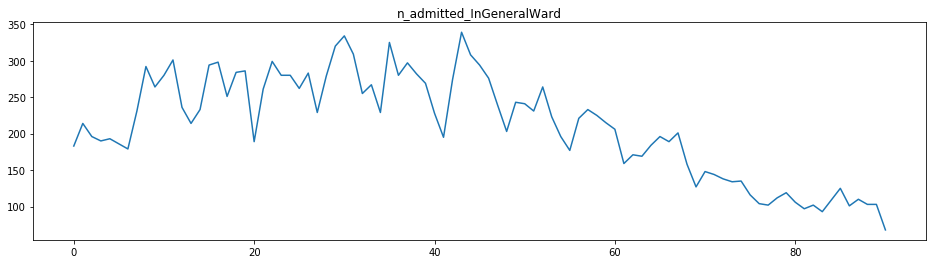

19288 admitted patients in this timeframe


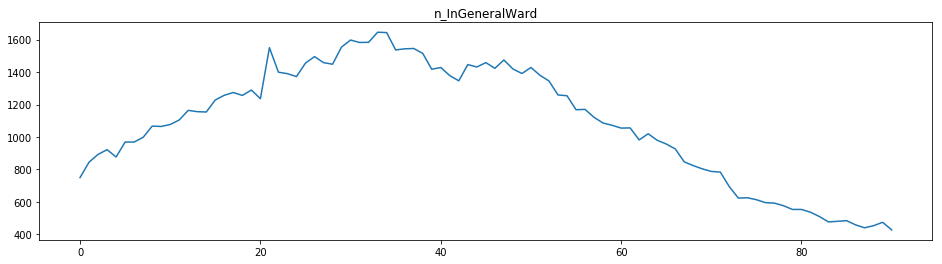

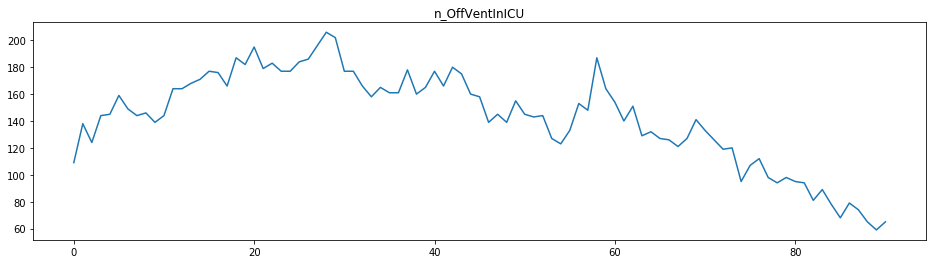

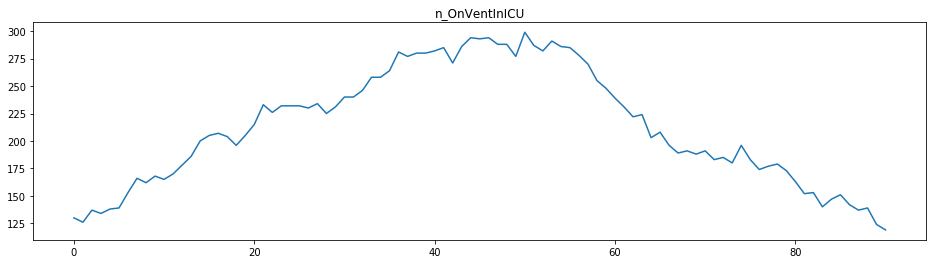

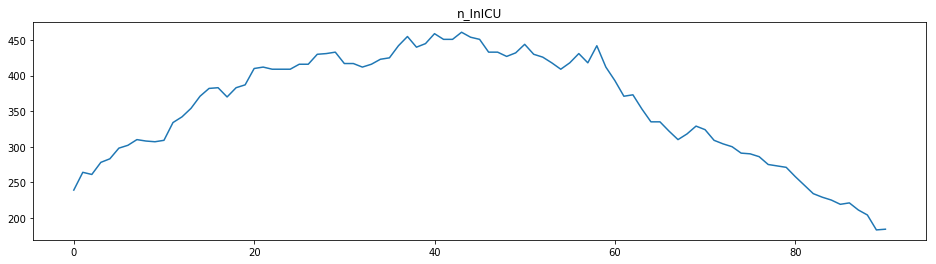

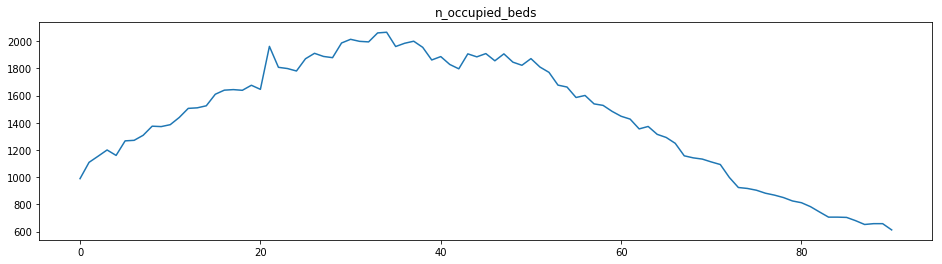

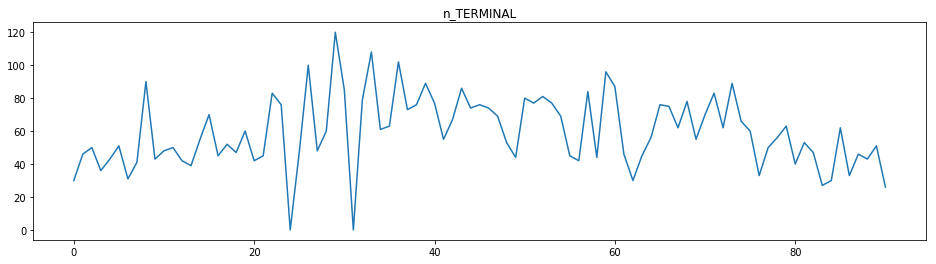

In [2]:
state = 'MA'
start_date = '20201201'
end_date = '20210301'

hObj = HospitalData(state, start_date, end_date)

admissions = hObj.get_Admission_counts()
InGeneralWard = hObj.get_InGeneralWard_counts()
OffVentInICU = hObj.get_OffVentInICU_counts()
OnVentInICU = hObj.get_OnVentInICU_counts()
InICU = hObj.get_ICU_counts()
n_occupied_beds = InGeneralWard + InICU
TERMINAL = hObj.get_Death_counts()

datadict = {'timestep': np.arange(admissions.shape[0]),
            'n_admitted_InGeneralWard': admissions,
            'n_InGeneralWard': InGeneralWard,
            'n_OffVentInICU': OffVentInICU,
            'n_OnVentInICU': OnVentInICU,
            'n_InICU': InICU,
            'n_occupied_beds': n_occupied_beds,
            'n_TERMINAL': TERMINAL}

# save filtered and formatted data - still need to smooth death counts. We do it manually on the csv file using excel
df = pd.DataFrame(datadict)
df.to_csv('%s_data/%s_%s_%s.csv' % (state, state, start_date, end_date))

timesteps = np.arange(admissions.shape[0])
plt.figure(figsize=(16, 4))
plt.title('n_admitted_InGeneralWard')
plt.plot(timesteps, admissions)
plt.show()
print('%d admitted patients in this timeframe' % (np.sum(admissions)))

plt.figure(figsize=(16, 4))
plt.title('n_InGeneralWard')
plt.plot(timesteps, InGeneralWard)
plt.show()

plt.figure(figsize=(16, 4))
plt.title('n_OffVentInICU')
plt.plot(timesteps, OffVentInICU)
plt.show()

plt.figure(figsize=(16, 4))
plt.title('n_OnVentInICU')
plt.plot(timesteps, OnVentInICU)
plt.show()

plt.figure(figsize=(16, 4))
plt.title('n_InICU')
plt.plot(timesteps, InICU)
plt.show()

plt.figure(figsize=(16, 4))
plt.title('n_occupied_beds')
plt.plot(timesteps, n_occupied_beds)
plt.show()

plt.figure(figsize=(16, 4))
plt.title('n_TERMINAL')
plt.plot(timesteps, TERMINAL)
plt.show()

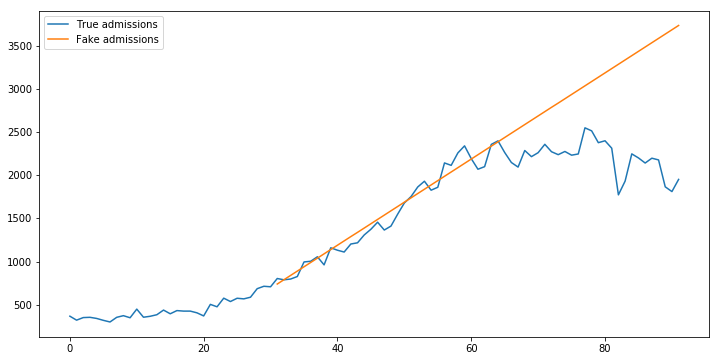

[   0  366  320  350  353  340  318  299  353  372  348  448  354  365
  383  437  394  431  425  425  405  369  503  475  575  536  574  567
  586  685  713  707  739  789  839  889  939  989 1039 1089 1139 1189
 1239 1289 1338 1388 1438 1488 1538 1588 1638 1688 1738 1788 1838 1888
 1938 1988 2038 2088 2138 2188 2238 2288 2338 2388 2438 2488 2538 2588
 2638 2688 2738 2788 2837 2887 2937 2987 3037 3087 3137 3187 3237 3287
 3337 3387 3437 3487 3537 3587 3637 3687 3737]


In [69]:
admissions = np.array(pd.read_csv('CA_data/CA_OctToJan_admissions.csv')['num_InGeneralWard'])[1:]

# fit linear regression between day 16 and day 31
from sklearn.linear_model import LinearRegression

low = 25
high = 60

X = np.array(range(low, high)).reshape(-1, 1)
Xpred = np.array(range(31, 92)).reshape(-1, 1)
y = admissions[low:high]
lr = LinearRegression()
lr.fit(X, y)

forecast = lr.predict(Xpred).astype(int)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(admissions.shape[0]), admissions, label='True admissions')
plt.plot(np.arange(forecast.shape[0]) + 31, forecast, label='Fake admissions')
plt.legend()
plt.show()

final = np.copy(admissions)
final[31:] = forecast
final = np.append(np.array([0]), final)

print(final)
new_admissions = {'timestep': np.arange(93), 'num_InGeneralWard': final}
df = pd.DataFrame(new_admissions)
df.to_csv('CA_data/CA_OctToJan_admissions_fake.csv')